In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Product Analyst Test Task Data - Task 1.csv')

<h1>Спочатку оглянемо датасет

In [4]:
df.describe()

,trial,paid,revenue_1m
count,15285.000000,15285.000000,15285.000000
mean,0.112725,0.017337,0.097297
std,0.316267,0.130529,0.782339
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,11.960000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15285 entries, 0 to 15284
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            15285 non-null  object 
 1   install_date       15285 non-null  object 
 2   country            15285 non-null  object 
 3   test_group         15285 non-null  object 
 4   trial              15285 non-null  int64  
 5   paid               15285 non-null  int64  
 6   subscription_name  1723 non-null   object 
 7   revenue_1m         15285 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 955.4+ KB


In [6]:
df.isna().sum()

user_id                  0
install_date             0
country                  0
test_group               0
trial                    0
paid                     0
subscription_name    13562
revenue_1m               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
0,0000dd3fa4702a63d1b76aaffe1ab39b,2023-06-05,US,treatment,0,0,NaN,0.0
1,0001f27ab7e22228e54c8b2028b43f24,2023-06-07,AU,treatment,0,0,NaN,0.0
2,0006c5c547801308b36ea3cf669856ae,2023-06-07,AU,treatment,0,0,NaN,0.0
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
4,000e5e62e8746e467ed9f49ac5de3208,2023-06-06,US,treatment,0,0,NaN,0.0


<h1>Розрахуємо конверсії для тестової і контрольної групи

In [95]:
metrics = df.groupby('test_group').agg({'trial':'sum', 
                                                    'paid':'sum',
                                                   'user_id':'count'})
metrics

,trial,paid,user_id
test_group,,,
control,925,116,7627
treatment,798,149,7658


In [177]:
metrics['Trial/Install'] = round(mectrics['trial']/mectrics['user_id']*100,2)
metrics['Paid/Trial'] = round(mectrics['paid']/mectrics['trial']*100,2)
metrics['Puchase/Install'] = round(mectrics['paid']/mectrics['user_id']*100,2)
metrics

,trial,paid,user_id,Trial/Install,Paid/Trial,Puchase/Install
test_group,,,,,,
control,925,116,7627,12.13,12.54,1.52
treatment,798,149,7658,10.42,18.67,1.95


In [97]:
metrics.rename(columns={'Trial/Install':'Conv_Trial/Install','Paid/Trial':'Conv_Paid/Trial'})

,trial,paid,user_id,Conv_Trial/Install,Conv_Paid/Trial
test_group,,,,,
control,925,116,7627,12.13,12.54
treatment,798,149,7658,10.42,18.67


<h1>Подивимось чи правильний розподіл по катергоріям юзерів в тестовій і контрольній групі

In [35]:
def segment_distribution(df, segment_columns, group):
    for segment in segment_columns:
        agg_data = df.groupby(by = [group, segment]).user_id.count().reset_index()
        sns.catplot(x=segment, y='user_id', hue = group, data=agg_data, kind='bar', height = 5, aspect = 2)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


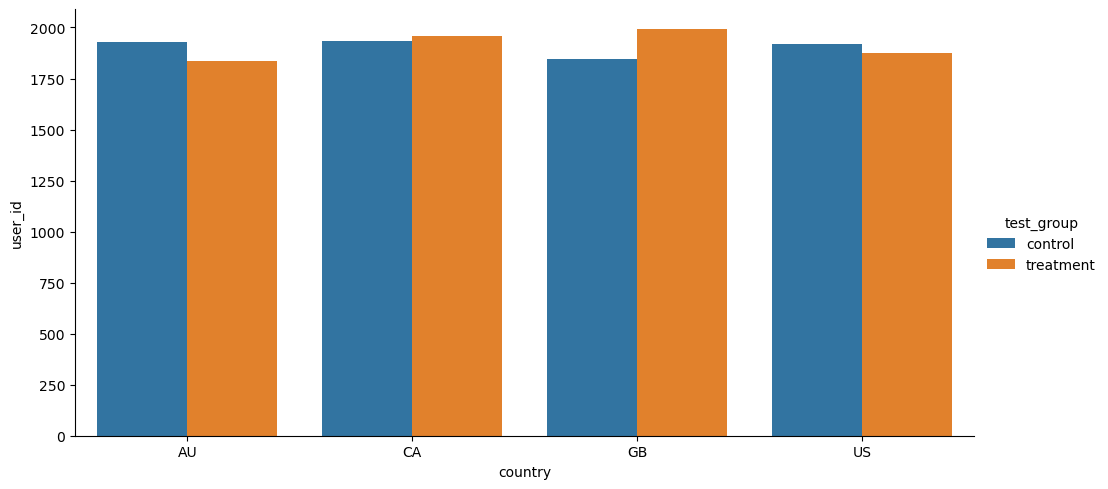

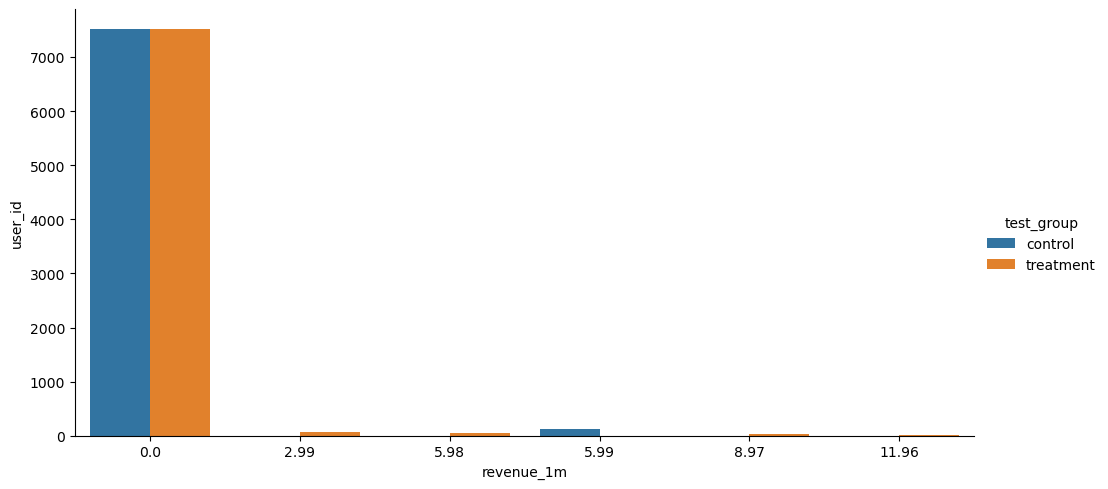

In [36]:
segment_distribution(df, ['country', 'revenue_1m'], 'test_group')

<h1>Подивимось результати по GEO

In [63]:
revenue = df.groupby(['country', 'test_group']).agg({'revenue_1m':'sum',
                                                     'trial':'sum', 
                                                    'paid':'sum',
                                                   'user_id':'count'
                                                    }).reset_index()
revenue['Trial/Install'] = round(revenue['trial']/revenue['user_id']*100,2)
revenue['Paid/Trial'] = round(revenue['paid']/revenue['trial']*100,2)
revenue

,country,test_group,revenue_1m,trial,paid,user_id,Trial/Install,Paid/Trial
0,AU,control,179.70,228,30,1928,11.83,13.16
1,AU,treatment,209.30,191,39,1835,10.41,20.42
2,CA,control,107.82,219,18,1936,11.31,8.22
3,CA,treatment,185.38,208,37,1959,10.62,17.79
4,GB,control,209.65,270,35,1846,14.63,12.96
5,GB,treatment,221.26,209,41,1991,10.50,19.62
6,US,control,197.67,208,33,1917,10.85,15.87
7,US,treatment,176.41,190,32,1873,10.14,16.84


In [64]:
df['install_date']=pd.to_datetime(df['install_date'])


In [55]:
df['install_date'].max()

Timestamp('2023-06-07 00:00:00')

<Axes: >

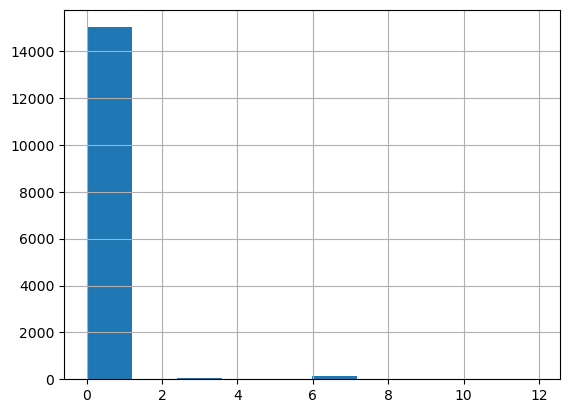

In [66]:
df['revenue_1m'].hist()

In [68]:
df.head()

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
0,0000dd3fa4702a63d1b76aaffe1ab39b,2023-06-05,US,treatment,0,0,NaN,0.0
1,0001f27ab7e22228e54c8b2028b43f24,2023-06-07,AU,treatment,0,0,NaN,0.0
2,0006c5c547801308b36ea3cf669856ae,2023-06-07,AU,treatment,0,0,NaN,0.0
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
4,000e5e62e8746e467ed9f49ac5de3208,2023-06-06,US,treatment,0,0,NaN,0.0


<h1> ARPU/ARPPU

In [86]:
df_paid_users = df[df['revenue_1m']>0]
ARPPU = df_paid_users.groupby('test_group').agg({'revenue_1m':'mean'})

ARPPU

,revenue_1m
test_group,
control,5.990000
treatment,5.317785


In [87]:
ARPU = df.groupby('test_group').agg({'revenue_1m':'mean',})
ARPU

,revenue_1m
test_group,
control,0.091103
treatment,0.103467


<h1>Проведемо стат. тест Хі-квадрат для біноміальної метрики конверсії

In [88]:
import statsmodels.stats.proportion as proportion

In [91]:
??proportion.proportions_chisquare

In [175]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['paid'],metrics['user_id'])
pval

0.04425398431753957

In [101]:
alpha = 0.05

In [103]:
print(pval<alpha)

True


<h1>Статистично значима різниця в конверсії знайдена, так як p-value нижче вибраної межі помилки першого типу 0,05.

In [104]:
!pip install bootstrapped

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13972 sha256=3b6a87e3d0d6fcdd6ceb82c198938f31e879b22a2adf9b4d3d1b57d5f59b36e4
  Stored in directory: c:\users\vovac\appdata\local\pip\cache\wheels\8b\47\d1\909397af2748ea916f6b72c346055e2426e7980bd1894b3633
Successfully built bootstrapped


In [107]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

<h1>Проведемо стат. тест для різниці в сердній виручкі між варіантами

In [108]:
df.head()

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
0,0000dd3fa4702a63d1b76aaffe1ab39b,2023-06-05,US,treatment,0,0,NaN,0.0
1,0001f27ab7e22228e54c8b2028b43f24,2023-06-07,AU,treatment,0,0,NaN,0.0
2,0006c5c547801308b36ea3cf669856ae,2023-06-07,AU,treatment,0,0,NaN,0.0
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
4,000e5e62e8746e467ed9f49ac5de3208,2023-06-06,US,treatment,0,0,NaN,0.0


In [149]:
control = df[df['test_group'] == 'control']['revenue_1m'].dropna().values
test = df[df['test_group'] == 'treatment']['revenue_1m'].dropna().values

In [150]:
boot_res = bs.bootstrap_ab(test=test, 
                           ctrl=control, 
                           stat_func=bs_stats.mean, 
                           compare_func=bs_compare.difference,
                           return_distribution=True)
boot_res

array([ 0.01822541,  0.00526908,  0.01707651, ..., -0.00137739,
        0.00967606,  0.04325402])

In [153]:
boot_res
borders=np.percentile(boot_res,[2.5,97.5])
import warnings
warnings.filterwarnings("ignore")
borders

array([-0.01263359,  0.03775689])

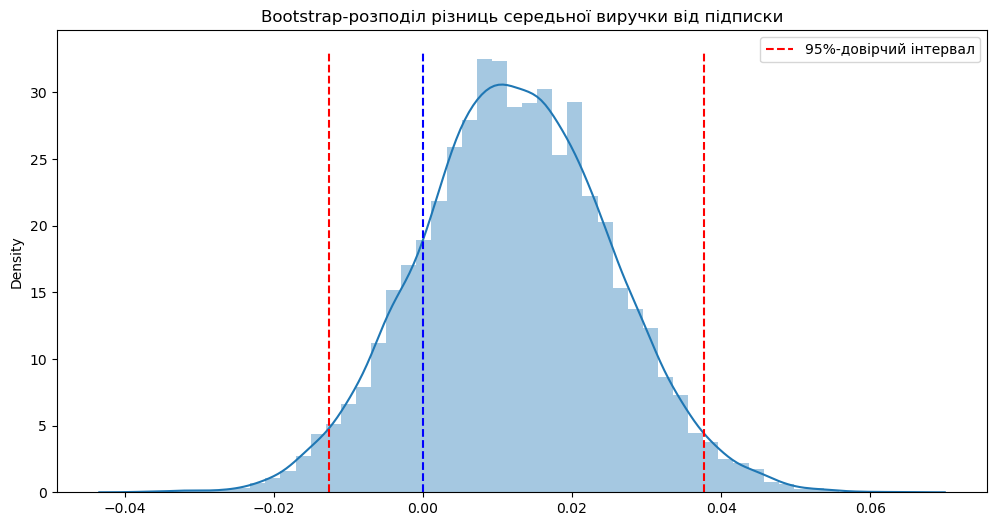

In [176]:
sns.distplot(boot_res)
plt.title('Bootstrap-розподіл різниць середьної виручки від підписки')
plt.rcParams['figure.figsize']=(12,6)
plt.vlines(0,ymin=0,ymax=33,linestyles='--',colors='blue')
plt.vlines(borders, ymin=0, ymax=33,linestyles='--',colors='red', label='95%-довірчий інтервал')
plt.legend()
plt.show()

<h1>Статистично значимої різниці для середнього чека не виявлено, адже 0 входить в довірчий інтервал різниці між групами.

In [159]:
import statsmodels.stats.power as smp
metrics

,trial,paid,user_id,Trial/Install,Paid/Trial
test_group,,,,,
control,925,116,7627,12.13,12.54
treatment,798,149,7658,10.42,18.67


In [160]:
chipower=smp.GofChisquarePower()

<h1>Перевіряємо потужність теста та необхідний розмір вибірки

In [161]:
conversion_control = metrics['Paid/Trial'].values[0]/100
conversion_test = metrics['Paid/Trial'].values[1]/100
nobs=min(metrics['user_id'])

In [166]:
def chi2_effect_size(p0,p1):
    return np.sqrt(((p0-p1)**2/p0))

In [168]:
chipower.solve_power(effect_size = chi2_effect_size(conversion_control, conversion_test),
                    nobs=nobs,
                    alpha = 0.05,
                    power = None)

1.0

In [169]:
power = 0.8

In [170]:
size_of_each_test_group=chipower.solve_power(effect_size = chi2_effect_size(conversion_control, conversion_test),
                    nobs=None,
                    alpha = 0.05,
                    power = power)

In [172]:
size_of_each_test_group*2

523.857533712812

<h1>Background:</h1>
    
<span style="font-size: 20px;">В даному датасеті продукт - мобільний застосунок з моделлю підписок, на якому запустили
монетизаційний A/B тест, в якому тестували альтернативну підписку:
    
<span style="font-size: 20px;">- control - користувачам пропонувалась місячна підписка за $5.99 з триденним пробним
періодом.

<span style="font-size: 20px;">- treatment - користувачам пропонувалась тижнева підписка за $2.99 з триденним
пробним періодом.
    
<span style="font-size: 20px;">Тест проводили протягом тижня на локаціях з Tier-1: Австралія, Велика Британія, США та
Канада.</span>

<h1>Висновки:</h1>
    
<span style="font-size: 20px;">- результати теста неоднозначні, по конверсіям в нового варіанту явний успіх, але нова аудиторія в середньому платить 1.8 раза на місяць, і це серйозно зменишло ARPPU, тому рішення чи приймати, чи відхиляти даний варіант залежить від стратегії компанії і наявних фінансових ресурсів. Це новвоведення серйозно збільшило конверсію з спроби пробного періода до купівлі підписки, можливо якщо направити фокус на етапи воронки «Click – Install» та «Install – Trial», то в майбутньому ефект від цього нововедення перевершить поточні втрати через падіння ARPPU. Тобто якщо компанія орієнтована на залучення нової бази юзерів – приймаємо тижневу підписку, якщо ціль компанії на даний момент підвищення монетизації – відхиляємо;
    
<span style="font-size: 20px;">- в експеремента правильний дизайн, вибірка достатня;

<span style="font-size: 20px;">- між конверсіями присутня статистична значимість: 
p-value(0.0442)<alpha;

<span style="font-size: 20px;">- між середніми чеками статистична різниця не виявлена, можливо вплив випадковості.